# Working with 15-min USGS data

In this exercise we will pull in USGS 15-min gage data from station [03171000 NEW RIVER AT RADFORD, VA](https://waterdata.usgs.gov/nwis/uv?site_no=03171000) to explore and analyze

## Load in the needed packages

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

# %matplotlib inline
import matplotlib.pyplot as plt
%matplotlib widget
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display 

## Loading and conditioning the data

Let's load in the csv file we created into a Pandas dataframe that we will call ```Q15``` and display the dataframe

In [2]:
datafile = 'NewRiver_1year_15minQ.csv'
Q15 = pd.read_csv(datafile)
Q15

,Org,Gage,Date,Time,Zone,Q_cfs,Type
0,USGS,3171000,2021-06-24,4:15,EDT,2560,A
1,USGS,3171000,2021-06-24,4:30,EDT,2560,A
2,USGS,3171000,2021-06-24,4:45,EDT,2560,A
3,USGS,3171000,2021-06-24,5:00,EDT,2560,A
4,USGS,3171000,2021-06-24,5:15,EDT,2560,A
...,...,...,...,...,...,...,...
35028,USGS,3171000,2022-06-24,2:15,EDT,1670,P
35029,USGS,3171000,2022-06-24,2:30,EDT,1640,P
35030,USGS,3171000,2022-06-24,2:45,EDT,1640,P
35031,USGS,3171000,2022-06-24,3:00,EDT,1670,P


Note that we would like to have the Date and Time as a single column so that we can change the string variables in each of the two columns into a single datetime variable in one column. We can accomplish by creating a new column ```Q15["DayTime"]``` that is the results of concatenating the Date column with a space and then the Time column

In [3]:
Q15["DateTime"] = Q15["Date"] +' '+ Q15["Time"]
display(Q15)

,Org,Gage,Date,Time,Zone,Q_cfs,Type,DateTime
0,USGS,3171000,2021-06-24,4:15,EDT,2560,A,2021-06-24 4:15
1,USGS,3171000,2021-06-24,4:30,EDT,2560,A,2021-06-24 4:30
2,USGS,3171000,2021-06-24,4:45,EDT,2560,A,2021-06-24 4:45
3,USGS,3171000,2021-06-24,5:00,EDT,2560,A,2021-06-24 5:00
4,USGS,3171000,2021-06-24,5:15,EDT,2560,A,2021-06-24 5:15
...,...,...,...,...,...,...,...,...
35028,USGS,3171000,2022-06-24,2:15,EDT,1670,P,2022-06-24 2:15
35029,USGS,3171000,2022-06-24,2:30,EDT,1640,P,2022-06-24 2:30
35030,USGS,3171000,2022-06-24,2:45,EDT,1640,P,2022-06-24 2:45
35031,USGS,3171000,2022-06-24,3:00,EDT,1670,P,2022-06-24 3:00


Let's take a look at the data type of each column

In [4]:
Q15.dtypes

Org         object
Gage         int64
Date        object
Time        object
Zone        object
Q_cfs        int64
Type        object
DateTime    object
dtype: object

Note that the DateTime column is just a text object. It would be great if we could change this to a 

In [5]:
Q15['DateTime'] = pd.to_datetime(Q15['DateTime'], format='%Y-%m-%d %H:%M')
display(Q15)

,Org,Gage,Date,Time,Zone,Q_cfs,Type,DateTime
0,USGS,3171000,2021-06-24,4:15,EDT,2560,A,2021-06-24 04:15:00
1,USGS,3171000,2021-06-24,4:30,EDT,2560,A,2021-06-24 04:30:00
2,USGS,3171000,2021-06-24,4:45,EDT,2560,A,2021-06-24 04:45:00
3,USGS,3171000,2021-06-24,5:00,EDT,2560,A,2021-06-24 05:00:00
4,USGS,3171000,2021-06-24,5:15,EDT,2560,A,2021-06-24 05:15:00
...,...,...,...,...,...,...,...,...
35028,USGS,3171000,2022-06-24,2:15,EDT,1670,P,2022-06-24 02:15:00
35029,USGS,3171000,2022-06-24,2:30,EDT,1640,P,2022-06-24 02:30:00
35030,USGS,3171000,2022-06-24,2:45,EDT,1640,P,2022-06-24 02:45:00
35031,USGS,3171000,2022-06-24,3:00,EDT,1670,P,2022-06-24 03:00:00


In [6]:
Q15.dtypes

Org                 object
Gage                 int64
Date                object
Time                object
Zone                object
Q_cfs                int64
Type                object
DateTime    datetime64[ns]
dtype: object

Now we have a unique date and time associated with each discharge value. Note that we could have accomplished the merger of the two original columns and transformation to datetime formate with the following single line: ```Q15['DateTime'] = pd.to_datetime(Q15["Date"] +' '+ Q15["Time"], format='%Y-%m-%d %H:%M')```

## Plot the discharge

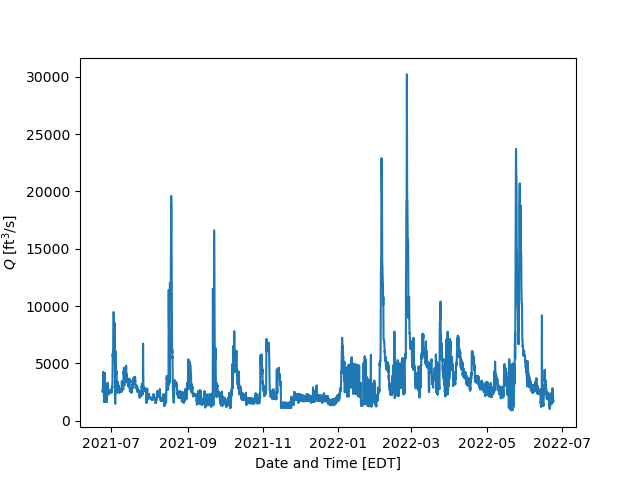

In [7]:
fig, ax1 = plt.subplots()
ax1.plot(Q15['DateTime'], Q15['Q_cfs'],alpha=1)
ax1.set_ylabel('$Q~\mathrm{[ft^3/s]}$')
ax1.set_xlabel('Date and Time [EDT]');

## Plot measured data on the time series

Now create a date time variable and discharge variable contianing your measured discharge values and add it to the figure to compare your results to the USGS prediction

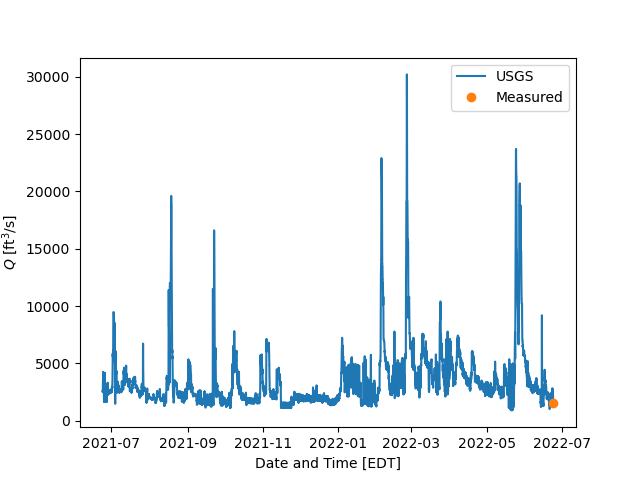

In [8]:
# enter your data... remember ot make the time a datetime value

DT_meas = datetime(2022,6,24,3,15,0)
Q_meas = 1500

# plot

fig, ax1 = plt.subplots()
ax1.plot(Q15['DateTime'], Q15['Q_cfs'],alpha=1, label='USGS')
ax1.plot(DT_meas, Q_meas,'o',alpha=1, label='Measured')
ax1.set_ylabel('$Q~\mathrm{[ft^3/s]}$')
ax1.set_xlabel('Date and Time [EDT]')
ax1.legend();

## Filtering a dataframe based based on a condition

Let's put a simple threshold value at $Q=10000$ $\mathrm{ft^3/s}$ across the plot and then find the data that crosses this threshold.

First we plot the data.

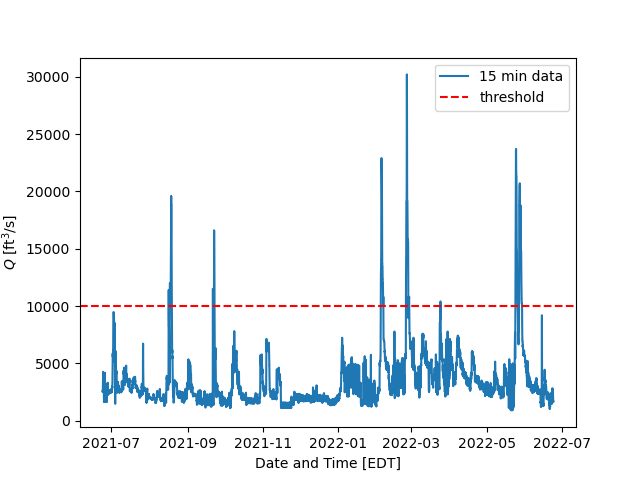

In [9]:
thresh = 10000

fig, ax1 = plt.subplots()
ax1.plot(Q15['DateTime'], Q15['Q_cfs'],alpha=1, label='15 min data')
ax1.axhline(y = thresh, color = 'r', linestyle = '--', label='threshold')
ax1.set_ylabel('$Q~\mathrm{[ft^3/s]}$')
ax1.set_xlabel('Date and Time [EDT]')
ax1.legend();

Now let's extract that data from the ```Q15``` dataframe for which $Q>Q_{\text{thresh}}$.

In [10]:
Q15.loc[(Q15['Q_cfs'] > thresh)]

,Org,Gage,Date,Time,Zone,Q_cfs,Type,DateTime
5139,USGS,3171000,2021-08-16,17:00,EDT,10500,A,2021-08-16 17:00:00
5140,USGS,3171000,2021-08-16,17:15,EDT,10900,A,2021-08-16 17:15:00
5141,USGS,3171000,2021-08-16,17:30,EDT,11200,A,2021-08-16 17:30:00
5142,USGS,3171000,2021-08-16,17:45,EDT,11400,A,2021-08-16 17:45:00
5143,USGS,3171000,2021-08-16,18:00,EDT,11300,A,2021-08-16 18:00:00
...,...,...,...,...,...,...,...,...
32589,USGS,3171000,2022-05-29,16:30,EDT,10200,P,2022-05-29 16:30:00
32590,USGS,3171000,2022-05-29,16:45,EDT,10200,P,2022-05-29 16:45:00
32591,USGS,3171000,2022-05-29,17:00,EDT,10200,P,2022-05-29 17:00:00
32592,USGS,3171000,2022-05-29,17:15,EDT,10200,P,2022-05-29 17:15:00


Now let's store the data above the threshold in a new dataframe we'll call ```Q15_high```

In [11]:
Q15_high = Q15.loc[(Q15['Q_cfs'] > thresh)]
display(Q15_high)

,Org,Gage,Date,Time,Zone,Q_cfs,Type,DateTime
5139,USGS,3171000,2021-08-16,17:00,EDT,10500,A,2021-08-16 17:00:00
5140,USGS,3171000,2021-08-16,17:15,EDT,10900,A,2021-08-16 17:15:00
5141,USGS,3171000,2021-08-16,17:30,EDT,11200,A,2021-08-16 17:30:00
5142,USGS,3171000,2021-08-16,17:45,EDT,11400,A,2021-08-16 17:45:00
5143,USGS,3171000,2021-08-16,18:00,EDT,11300,A,2021-08-16 18:00:00
...,...,...,...,...,...,...,...,...
32589,USGS,3171000,2022-05-29,16:30,EDT,10200,P,2022-05-29 16:30:00
32590,USGS,3171000,2022-05-29,16:45,EDT,10200,P,2022-05-29 16:45:00
32591,USGS,3171000,2022-05-29,17:00,EDT,10200,P,2022-05-29 17:00:00
32592,USGS,3171000,2022-05-29,17:15,EDT,10200,P,2022-05-29 17:15:00


Just for fun, let's plot the discharge that exceeded the threshold in a different color

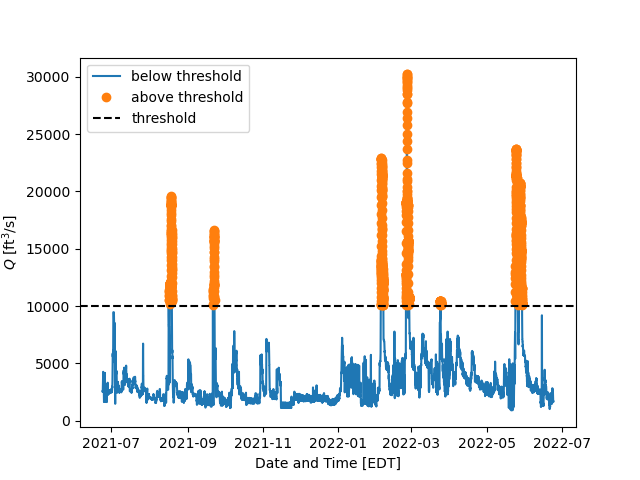

In [12]:
fig, ax1 = plt.subplots()
ax1.plot(Q15['DateTime'], Q15['Q_cfs'],alpha=1, label='below threshold')
ax1.plot(Q15_high['DateTime'], Q15_high['Q_cfs'], 'o', alpha=1, label='above threshold')
ax1.axhline(y = thresh, color = 'k', linestyle = '--', label='threshold')
ax1.set_ylabel('$Q~\mathrm{[ft^3/s]}$')
ax1.set_xlabel('Date and Time [EDT]')
ax1.legend();

Let's determine what fraction of time over the past year $Q>Q_{\text{thresh}}$. Since our data frequency is constant, we can obtain this simply be dividing the number of times the flow was above the threshold by the total number of data points. 

In [13]:
frac_t_high = len(Q15_high)/len(Q15)
print('For',frac_t_high*100,'% of the past year, flows at the New River station exceeded Q =',thresh,'[cfs]')

For 3.1484600234065026 % of the past year, flows at the New River station exceeded Q = 10000 [cfs]


Let's clean up the print statement some by removing some of the digits following the decimals

In [14]:
print('For',np.around(frac_t_high*100,decimals=1),'% of the past year, flows at the New River station exceeded Q =',thresh,'[cfs]')

For 3.1 % of the past year, flows at the New River station exceeded Q = 10000 [cfs]


## Exceedance

Another way to look at this would be by calculating the total commulative exceedence curve for the 15 min data. From this we would be able to look at the threshold $Q$ and read off the fraction of time exceeded. To do this we can rank all of the $Q$ data from smallest to largest, asign a rank for each, and the calculate the fraction of time exceeded.

Let's start by taking the Pandas dataframe colum ```Q15['Q_cfs']``` and then save it as a numpy array

In [15]:
Q_sorted = np.array(sorted(Q15['Q_cfs']))

How long is the array?

In [16]:
len(Q_sorted)

35033

Let's rank the $Q$ values as integers going from 1 to the ```len(Q_sorted)```

In [17]:
rank = np.arange(len(Q_sorted))+1
rank

array([    1,     2,     3, ..., 35031, 35032, 35033])

Now calculate the fraction of time exceeded

In [18]:
frac_exceeded = 1-rank/(len(rank))
frac_exceeded

array([9.99971455e-01, 9.99942911e-01, 9.99914366e-01, ...,
       5.70890303e-05, 2.85445152e-05, 0.00000000e+00])

Plot the fraction exceeded vs the sorted $Q$ values and put a straight line through the plot at our previously calculated fraction of time above $Q_{\text{thres}}$ sorted in the variable ```frac_t_high```. We are looking to see if the threshold line crosses the exceedence curve at our defined $Q_{\text{thres}}$. 

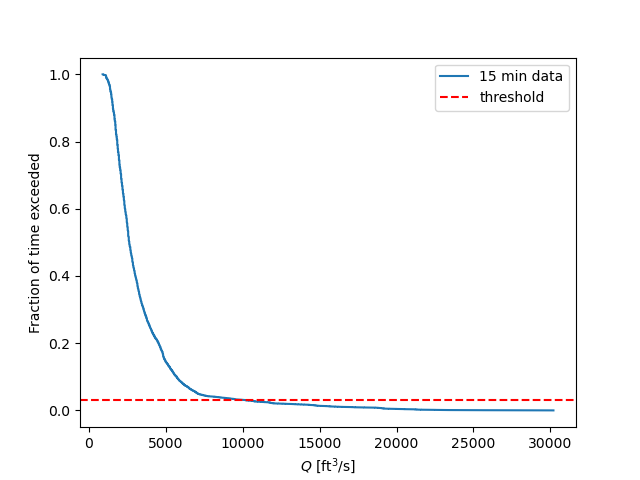

In [19]:
fig, ax1 = plt.subplots()
ax1.plot(Q_sorted, frac_exceeded,alpha=1, label='15 min data')
ax1.axhline(y = frac_t_high, color = 'r', linestyle = '--', label='threshold')
ax1.set_xlabel('$Q~\mathrm{[ft^3/s]}$')
ax1.set_ylabel('Fraction of time exceeded')
ax1.legend();